![title](./pics/dd_logo.png) 

# Getting started

**deep**doctection is a package that can be used to extract text from complex structured documents. It also allows to run multi-modal models (text+vision) in an end-to end pipeline. Inputs can be native PDFs or images. In contrast to various text miners **deep**doctection makes use of deep learning models from powerful third party libraries solving OCR, vision or classification or entity recognition problems. It is very versatile.

This notebook will give you a quick introduction to show you, how you can use **deep**doctection for extracting text information from complex documents. 

We assume that you have successfully installed **deep**doctection with Tensorflow or Pytorch extension and that you can run Tesseract.

In [1]:
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from IPython.core.display import HTML

import deepdoctection as dd

## Sample

Take an image (e.g. .png, .jpg, ...). If you take the example below you'll maybe need to change ```image_path```.

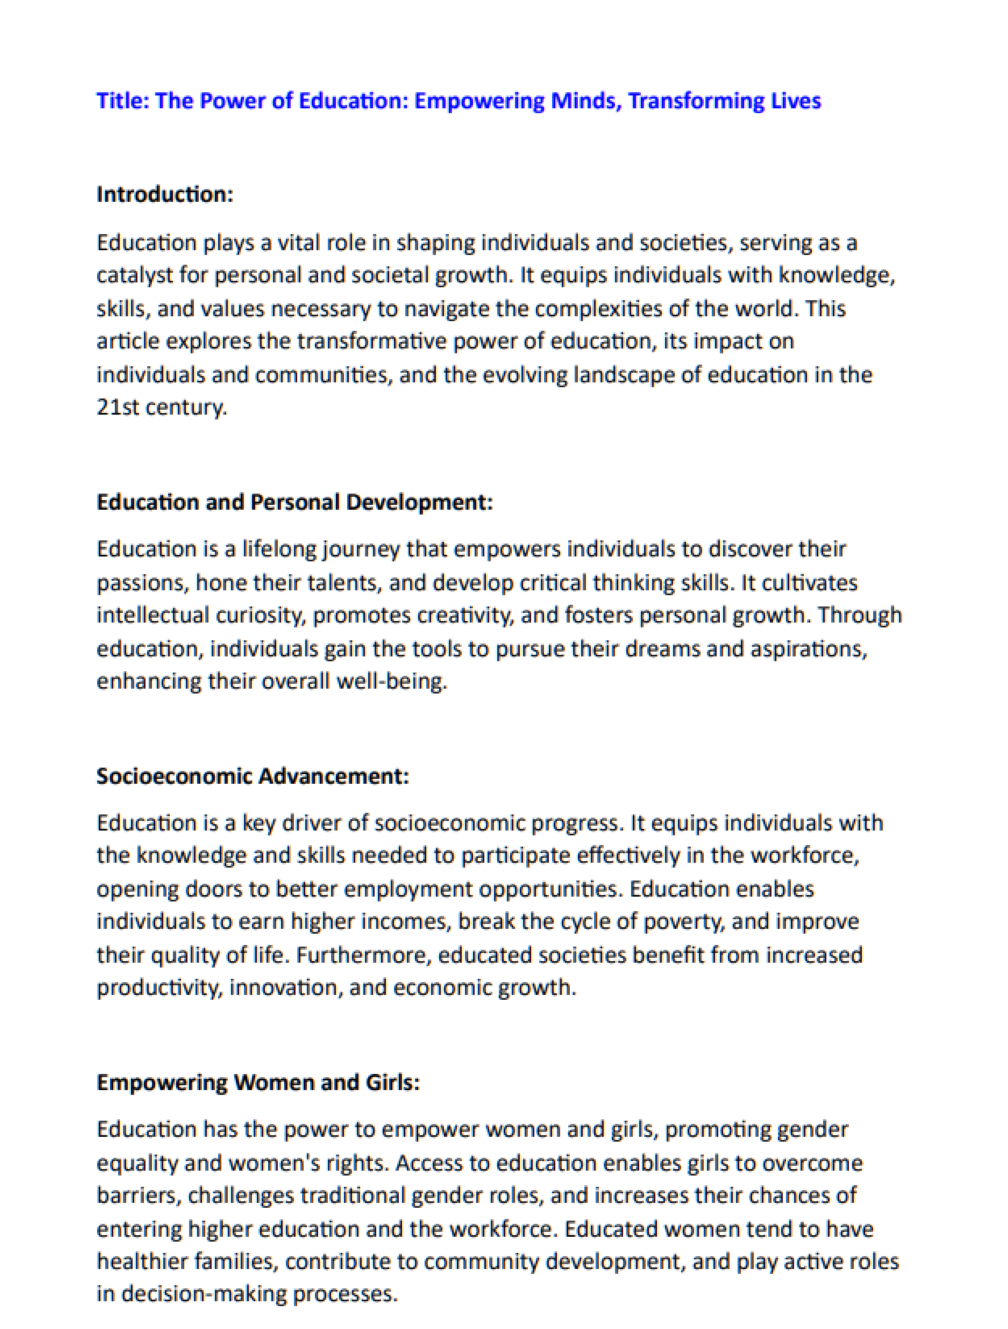

In [28]:
image_path = Path.cwd() / "pics/cinput1.png"
image = cv2.imread(image_path.as_posix())
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

![title](./pics/samples/sample_2/sample_2.png)

## Analyzer

Next, we instantiate the **deep**doctection analyzer. The analyzer is an example of a pipeline that can be built depending on the problem you want to tackle. This particular pipeline is built from various building blocks. We will come back to this later. 

Because the document is german we will be using Tesseract's model trained on german text (config_overwrite=["LANGUAGE='deu'"]). If you have a document in a different language choose one by entering its [LangCode](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html). Here are some examples: `fra`, `nld`, `chi_sim`, `ces`, `fas`, `ell`, `mkd`, `ron`, `hye`, `kat`. 

This will give you, depending on your language, much better results than using the default english model.

In [29]:
analyzer = dd.get_dd_analyzer(config_overwrite=["LANGUAGE='deu'"])

[1121 23:06.38 @dd.py:422]  INF  Config: 
 {'DEVICE': 'cpu',
 'LANGUAGE': 'deu',
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': None, 'PRIORITY': None, 'THRESHOLDS': None},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': False,
         'USE_TESSERACT': True,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PT': {'CELL': {'FILTER': None,
                 'WEIGHTS': 'cell/d2_model_1849999_cell_inf_only.pt',
                 'WEIGHTS_TS': 'cell/d2_model_1849999_cell_inf_only.ts'},
        'ITEM': {'FILTER': None,
                 'PAD': {'BOTTOM': 60, 'LEFT': 60, 'RIGHT': 60, 'TOP': 

## Analyze methods

Once all models have been loaded, we can process single pages, multi page PDF-documents or `Dataflow`s. Leaving `Dataflow`s aside for now, you can either set `path='path/to/dir'` if you have a folder of images or `path='path/to/my/doc.pdf'` if you have a pdf document. 

You will receive an error if your path points to a single image. Processing images requires to pass the path to the base image directory.

In [31]:
path = Path.cwd() / "pics"

df = analyzer.analyze(path=path)
df.reset_state()  # This method must be called just before starting the iteration. It is part of the API.

|                                                                                                                         |18/?[00:00<00:00,41413.86it/s]


You can see, when activating the cell, that not much has happened yet. The reason is that `analyze` is a [generator function](https://wiki.python.org/moin/Generators). It does not return instantly any results. Instead it returns a `Dataflow`. 

A `Dataflow` is an object to create iterators for data loading and data processing. You can traverse through all the values of the `Dataflow` simply by using a `for`-loop or the `next` function. Let's go!  

In [32]:
doc=iter(df)
page = next(doc)

[1121 23:07.18 @doctectionpipe.py:84]  INF  Processing cinput1.png
[1121 23:07.20 @context.py:126]  INF  ImageLayoutService total: 2.475 sec.
[1121 23:07.20 @context.py:126]  INF  SubImageLayoutService total: 0.0 sec.
[1121 23:07.20 @context.py:126]  INF  SubImageLayoutService total: 0.0 sec.
[1121 23:07.20 @context.py:126]  INF  TableSegmentationService total: 0.0 sec.
[1121 23:07.20 @context.py:126]  INF  TableSegmentationRefinementService total: 0.0 sec.
[1121 23:07.21 @context.py:126]  INF  TextExtractionService total: 0.6278 sec.
[1121 23:07.21 @context.py:126]  INF  MatchingService total: 0.0018 sec.
[1121 23:07.21 @context.py:126]  INF  TextOrderService total: 0.0115 sec.


## Page

Let's see what we got back. For each iteration we receive a `Page` object. This object stores all informations that have been collected from a page document when running through the pipeline. 

In [33]:
type(page)

deepdoctection.datapoint.view.Page

Let's also have a look on some top level information. 

In [7]:
print(f" height: {page.height} \n width: {page.width} \n file_name: {page.file_name} \n document_id: {page.document_id} \n image_id: {page.image_id}\n")

 height: 2339.0 
 width: 1654.0 
 file_name: sample_2.png 
 document_id: c2bec91c-d8fc-3e95-aa51-0f2c986683d4 
 image_id: c2bec91c-d8fc-3e95-aa51-0f2c986683d4



`document_id` and `image_id` are the same. The reason is because we only process a single image. The naming convention silently assumes that we deal with a one page document. Once we process multi page PDFs `document_id` and `image_id` differ.

With `get_attribute_names()` you get a list of all attributes. 

In [8]:
page.get_attribute_names()

{'chunks',
 'document_id',
 <PageType.document_type>,
 'file_name',
 <PageType.language>,
 'layouts',
 'location',
 'page_number',
 'tables',
 'text',
 'words'}

In [9]:
page.document_type, page.language

(None, None)

`page.document_type` and `page.language` both return None. The reason is that the analyzer has no component for predicting a document type or a language.

You can easily build a custom analyzer/pipeline containing a document classifier, though. Check this [notebook](Using_LayoutLM_for_sequence_classification.ipynb) for further information.

## Layout segments

We can visualize detected layout segments. If you set `interactive=True` a viewer will pop up. Use `+` and `-` to zoom out/in. Use `q` to close the page.

Alternatively, you can visualize the output with matplotlib.

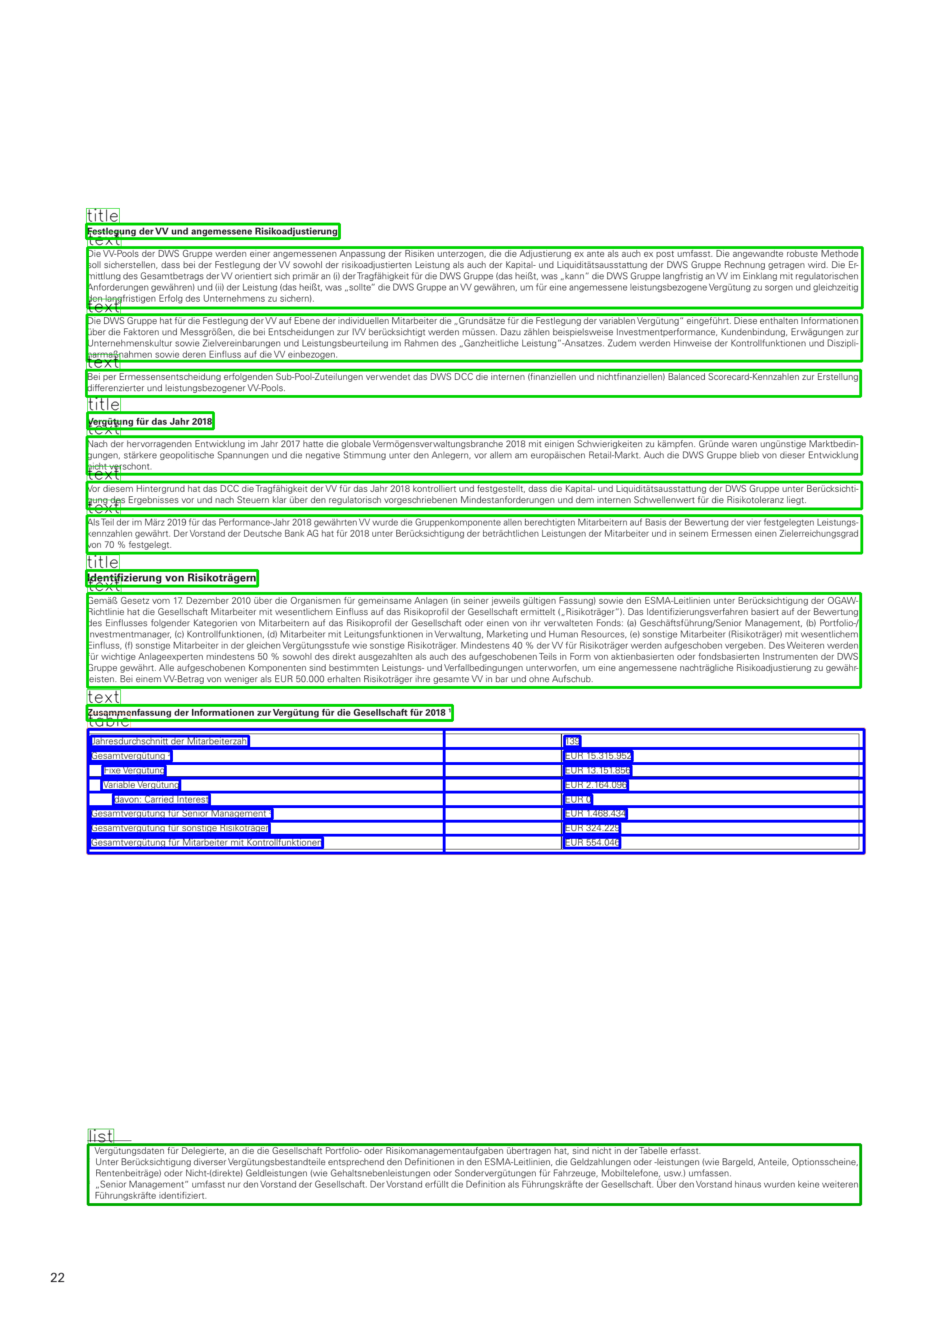

In [10]:
image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

![title](./pics/output_16_1.png)

Let's have a look at other attributes. We can use the `text` property to get the content of the document. You will notice that the table is not included. You can therefore filter tables from the other content. In fact you can even filter on every layout segment.

In [11]:
print(page.text)

Festlegung der VV und angemessene Risikoadjustierung
Die VV-Pools der DWS Gruppe werden einer angemessenen Anpassung der Risiken unterzogen, die die Adjustierung ex ante als auch ex post umfasst. Die angewandte robuste Methode soll sicherstellen, dass bei der Festlegung der VV sowohl der risikoadjustierten Leistung als auch der Kapital- und Liquiditätsausstattung der DWS Gruppe Rechnung getragen wird. Die Er- mittlung des Gesamtbetrags der VV orientiert sich primär an (i) der Tragfähigkeit für die DWS Gruppe (das heißt, was „kann” die DWS Gruppe langfristig an VV im Einklang mit regulatorischen ‚Anforderungen gewähren) und (il) der Leistung (das heißt, was „sollte” die DWS Gruppe an VV gewähren, um für eine angemessene leistungsbezogene Vergütung zu sorgen und gleichzeitig den langfristigen Erfolg des Unternehmens zu sichern)
Die DWS Gruppe hat für die Festlegung der VV auf Ebene der individuellen Mitarbeiter die „Grundsätze für die Festlegung der variablen Vergütung” eingeführt. Diese

You can get the individual layout segments like `text`, `title`, `list` or `figure`. 

In [12]:
for layout in page.layouts:
    if layout.category_name=="title":
        print(f"Title: {layout.text}")

Title: Identifi ierung von Risikoträgern
Title: Vergütung für das Jahr 2018
Title: Festlegung der VV und angemessene Risikoadjustierung


You can also get the layout segments from the `chunks` attribute. The output is a list of tuples with the most essential meta data for each layout segment, namely: `document_id, image_id, page_number, annotation_id, reading_order, category_name` and `text`.

In [13]:
page.chunks[0]

('c2bec91c-d8fc-3e95-aa51-0f2c986683d4',
 'c2bec91c-d8fc-3e95-aa51-0f2c986683d4',
 0,
 '341db61e-ddd3-3dd8-a7b1-388293753bce',
 1,
 <LayoutType.title>,
 'Festlegung der VV und angemessene Risikoadjustierung')

Tables cannot be retrieved from `page.layouts`. They have a special `page.tables` which is a python list of table objects. Obviously, only one table has been detected. 

In [14]:
len(page.tables)

1

Let's have a closer look at the table. 

In [15]:
table = page.tables[0]
table.get_attribute_names()

{'bbox',
 'cells',
 'columns',
 'csv',
 <TableType.html>,
 <TableType.item>,
 <TableType.max_col_span>,
 <TableType.max_row_span>,
 <TableType.number_of_columns>,
 <TableType.number_of_rows>,
 <Relationships.reading_order>,
 'rows',
 'text',
 'words'}

In [16]:
print(f" number of rows: {table.number_of_rows} \n number of columns: {table.number_of_columns} \n reading order: {table.reading_order}")

 number of rows: 8 
 number of columns: 2 
 reading order: None


There is no reading order. The reason is that we have excluded tables from having a specific reading order position because we want to separate tables from the narrative text. This is pure customizing and we can change the customizing so that tables are part of the narrative text. We will come to this later.

You can get an html, csv or text version of your table. Use `table.csv` to load the table into a Pandas Dataframe.

In [17]:
HTML(table.html)

Jahresdurchschnitt der Mitarbeiterzahl,139
Gesamtvergütung ?,EUR 15.315.952
Fixe Vergütung,EUR 13.151.856
Variable Vergütung,EUR 2.164.096
davon: Carried Interest,EURO
Gesamtvergütung für Senior Management ®,EUR 1.468.434
Gesamtvergütung für sonstige Risikoträger,EUR 324.229
Gesamtvergütung für Mitarbeiter mit Kontrollfunktionen,EUR 554.046


In [18]:
table.csv

[['Jahresdurchschnitt der Mitarbeiterzahl ', '139 '],
 ['Gesamtvergütung ? ', 'EUR 15.315.952 '],
 ['Fixe Vergütung ', 'EUR 13.151.856 '],
 ['Variable Vergütung ', 'EUR 2.164.096 '],
 ['davon: Carried Interest ', 'EURO '],
 ['Gesamtvergütung für Senior Management ® ', 'EUR 1.468.434 '],
 ['Gesamtvergütung für sonstige Risikoträger ', 'EUR 324.229 '],
 ['Gesamtvergütung für Mitarbeiter mit Kontrollfunktionen ', 'EUR 554.046 ']]

In [19]:
table.text

'Jahresdurchschnitt der Mitarbeiterzahl  139  \n Gesamtvergütung ?  EUR 15.315.952  \n Fixe Vergütung  EUR 13.151.856  \n Variable Vergütung  EUR 2.164.096  \n davon: Carried Interest  EURO  \n Gesamtvergütung für Senior Management ®  EUR 1.468.434  \n Gesamtvergütung für sonstige Risikoträger  EUR 324.229  \n Gesamtvergütung für Mitarbeiter mit Kontrollfunktionen  EUR 554.046  \n'

Let's go deeper down the rabbit hole. A `Table` has cells and we can even get the text of one particular cell. Note that the output list is not sorted by row or column. You have to do it yourself.

In [20]:
cell = table.cells[0]
cell.get_attribute_names()

{'bbox',
 <CellType.body>,
 <CellType.column_header>,
 <CellType.column_number>,
 <CellType.column_span>,
 <CellType.header>,
 <CellType.projected_row_header>,
 <Relationships.reading_order>,
 <CellType.row_header>,
 <CellType.row_number>,
 <CellType.row_span>,
 <CellType.spanning>,
 'text',
 'words'}

In [21]:
print(f"column number: {cell.column_number} \n row_number: {cell.row_number} \n text: {cell.text} \n annotation_id: {cell.annotation_id}")

column number: 1 
 row_number: 8 
 text: Gesamtvergütung für Mitarbeiter mit Kontrollfunktionen 
 annotation_id: de1c362b-a2f1-33ec-9c88-e1157702e4dc


Still not down yet, we have a list of words that is responsible to generate the text string.

In [22]:
word = cell.words[0]
word.get_attribute_names()

{'bbox',
 <WordType.block>,
 <WordType.character_type>,
 <WordType.characters>,
 <WordType.handwritten>,
 <WordType.printed>,
 <Relationships.reading_order>,
 <WordType.tag>,
 <WordType.text_line>,
 <WordType.token_class>,
 <WordType.token_tag>}

The reading order determines the string position of the word characters in a cell segment. 

When inferring the reading order of a page we therefore have to distinguish between high and low level reading orders: A high level reading order where layout segments such as `title`, `text` or `cell` are being involved and a low word level reading order where `word`s have to be arranged into some narrative text.  

Let's look at some more attributes.

In [23]:
print(f" characters: {word.characters} \n reading order: {word.reading_order} \n token class: {word.token_class}")

 characters: Gesamtvergütung 
 reading order: 1 
 token class: None


## Saving and reading

You can use the `save` method to save the result of the analyzer in a `.json` file. Setting `image_to_json=True` you will also save image as b64 encoding in the file. Beware, the files are quite large then. 

In [26]:
page.save(image_to_json=True, path="/test.json")

PermissionError: [Errno 13] Permission denied: '/test.json'

Having saved the results you can easily parse the file into the `Page` format without loosing any information. 

In [27]:
page = dd.Page.from_file(file_path="/path/to/dir/test.json")

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/dir/test.json'

The `Page` object is read-only and even though you can change the value it will not be persisted.

In [25]:
word.token_class = "ORG"

In [26]:
word #  __repr__ of the base object does carry <WordType.token_class> information.  

Word(active=True, _annotation_id='844631a5-5ddb-3ba8-b81a-bb9f05604d58', category_name=<LayoutType.word>, _category_name=<LayoutType.word>, category_id='1', score=0.91, sub_categories={<WordType.characters>: ContainerAnnotation(active=True, _annotation_id='ded39c8a-72c0-335b-853f-e6c8b50fbfbc', category_name=<WordType.characters>, _category_name=<WordType.characters>, category_id='None', score=0.91, sub_categories={}, relationships={}, value='Gesamtvergütung'), <Relationships.reading_order>: CategoryAnnotation(active=True, _annotation_id='9a2ced50-d1b6-378e-bbb7-49b8d3cfee61', category_name=<Relationships.reading_order>, _category_name=<Relationships.reading_order>, category_id='1', score=None, sub_categories={}, relationships={})}, relationships={}, bounding_box=BoundingBox(absolute_coords=True, ulx=146, uly=1481, lrx=277, lry=1496, height=15, width=131))

There is no easy way yet to modify results. In tutorial **Diving deeper into the data structure** we will show how you can do this. 

## Where to go from here

If you want to get a deeper understanding how a pipeline is composed, we suggest to look at the [pipeline notebook](./Pipelines.ipynb).